### Lista de exercício 4
Uma medida experimental foi feita em uma área de 64x64 pixels. Foram
realizadas 66 medidas no tempo. O pesquisador quer saber em qual parte de sua
amostra teve um comportamento similar a uma função descrita na variável preditora.
Utilizando o Coeficiente de correlação de Pearson encontre quais regiões da
imagem1 e imagem2 tem uma dinâmica temporal parecida com a função preditora.
As variáveis estão no arquivo lista4.mat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
data = loadmat('lista4.mat')
img1 = data.get('imagem1')
img2 = data.get('imagem2')
preditor = data.get('preditora')
preditor = np.squeeze(preditor)

In [2]:
def get_coef(vec1, vec2):
    coef_matrix = np.corrcoef([vec1, vec2])
    coef_matrix = np.nan_to_num(coef_matrix)
    return coef_matrix[0, 1]

def process(img, preditor):
    x, y = img.shape[:2]
    result = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            result[i][j] = get_coef(img[i, j], preditor)
    return result

In [3]:
result_1 = process(img1, preditor)
result_2 = process(img2, preditor)

/home/yu/venvs/dsp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/yu/venvs/dsp/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


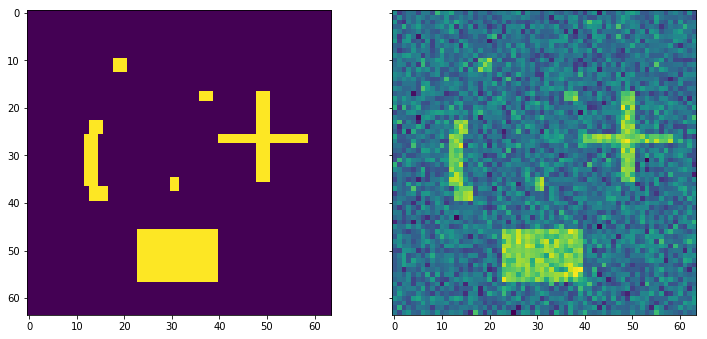

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 10))
ax1.imshow(result_1)
ax2.imshow(result_2)